### Observations

1.  The BBC News was the only outlet to have a positive average compound sentiment analysis.
2.  CNN had the most negative average compound sentiment analysis of all the news outlets.
3.  The New York times had, on average, the most neutral sentiment over the last 100 tweets.

In [1]:
# Dependencies
import tweepy
import time
import datetime
import json
import pandas as pd
import numpy as np

In [2]:
#Twitter API Keys
consumer_key = "###########################"
consumer_secret = "###################################"
access_token = "############################################"
access_token_secret = "##############################################"

# Twitter Credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#List to gather data
news_outlet_list = ['@BBCNews','@CBSNews','@CNN','@FoxNews','@nytimes']
news_outlet = []
tweet_user = []
tweet_text = []
tweet_date = []

In [4]:
#get tweet data
for news in news_outlet_list:
	for x in range(5):
		public_tweets = api.user_timeline(news, count=20, page=x)
		for tweet in public_tweets:
			news_outlet.append(news)
			tweet_user.append(tweet['user']['screen_name'])
			tweet_text.append(tweet['text'])
			tweet_date.append(tweet['created_at'])
			#time.sleep(5)

len(tweet_text)

500

In [5]:
#create Dict of tweet data
tweets_dict = {'news_outlet':news_outlet,
			'username': tweet_user,
			'tweet_text': tweet_text,
			'tweet_date':tweet_date,
}

df_tweets = pd.DataFrame.from_dict(tweets_dict)

df_tweets['compound']=''
df_tweets['positive']=''
df_tweets['negative']=''
df_tweets['neutral']=''

df_tweets.head(5)

,news_outlet,tweet_date,tweet_text,username,compound,positive,negative,neutral
0,@BBCNews,Mon Dec 18 01:49:35 +0000 2017,Depression: 'I kept my head down to survive th...,BBCNews,,,,
1,@BBCNews,Mon Dec 18 01:38:59 +0000 2017,Steroid abuse 'raising health risk for thousan...,BBCNews,,,,
2,@BBCNews,Sun Dec 17 22:18:02 +0000 2017,The Apprentice: Lord Sugar surprises viewers w...,BBCNews,,,,
3,@BBCNews,Sun Dec 17 21:32:20 +0000 2017,BBC Sports Personality of the Year 2017: World...,BBCNews,,,,
4,@BBCNews,Sun Dec 17 21:06:29 +0000 2017,"RT @BBCSport: He won his third consecutive 10,...",BBCNews,,,,


In [6]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#add sentiment scores to dataframe
for index,row in df_tweets.iterrows():

    # Run Vader Analysis on each tweet
    compound = analyzer.polarity_scores(row["tweet_text"])["compound"]
    pos = analyzer.polarity_scores(row["tweet_text"])["pos"]
    neu = analyzer.polarity_scores(row["tweet_text"])["neu"]
    neg = analyzer.polarity_scores(row["tweet_text"])["neg"]

    # Add each value to the appropriate array
    row['compound'] = compound
    row['positive'] = pos
    row['negative'] = neg
    row['neutral'] = neu

#Add date field and sort descending
df_tweets['date'] = pd.to_datetime(df_tweets['tweet_date'])
df_tweets_sort = df_tweets.sort_values(by='date',ascending=False).reset_index(drop=True)
df_tweets_sort.head()


,news_outlet,tweet_date,tweet_text,username,compound,positive,negative,neutral,date
0,@nytimes,Mon Dec 18 02:32:12 +0000 2017,Toronto Buzzes With Talk of Billionaire Couple...,nytimes,-0.7506,0,0.444,0.556,2017-12-18 02:32:12
1,@nytimes,Mon Dec 18 02:32:12 +0000 2017,Toronto Buzzes With Talk of Billionaire Couple...,nytimes,-0.7506,0,0.444,0.556,2017-12-18 02:32:12
2,@FoxNews,Mon Dec 18 02:23:34 +0000 2017,#ALSen.-Elect @GDouglasJones Calls for 'Common...,FoxNews,0,0,0,1,2017-12-18 02:23:34
3,@FoxNews,Mon Dec 18 02:22:14 +0000 2017,".@KevinJacksonTBS: ""They say nothing is foolpr...",FoxNews,-0.1984,0.154,0.238,0.608,2017-12-18 02:22:14
4,@FoxNews,Mon Dec 18 02:22:14 +0000 2017,".@KevinJacksonTBS: ""They say nothing is foolpr...",FoxNews,-0.1984,0.154,0.238,0.608,2017-12-18 02:22:14


In [7]:
#Export dataframe to csv
df_tweets_sort.to_csv('News_Tweets_Data.csv',index=False)

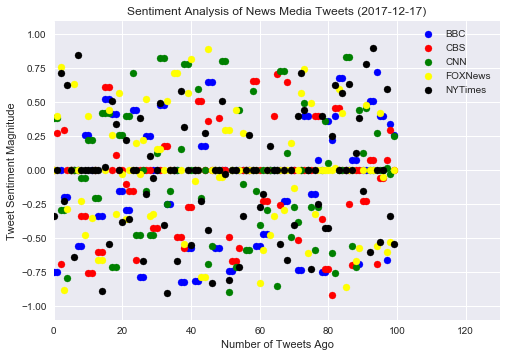

In [68]:
#Create Scatter plot of each tweet's compound sentiment. 
#['@BBCNews','@CBSNews','@CNN','@FoxNews','@nytimes']
import matplotlib.pyplot as plt
import seaborn as sns

df_bbc = df_tweets_sort.loc[df_tweets['news_outlet']=='@BBCNews']
df_cbs = df_tweets_sort.loc[df_tweets['news_outlet']=='@CBSNews']
df_cnn = df_tweets_sort.loc[df_tweets['news_outlet']=='@CNN']
df_fox = df_tweets_sort.loc[df_tweets['news_outlet']=='@FoxNews']
df_nyt = df_tweets_sort.loc[df_tweets['news_outlet']=='@nytimes']

plt.scatter(range(len(df_bbc)),df_bbc['compound'],color = 'blue',label='BBC')
plt.scatter(range(len(df_cbs)),df_cbs['compound'],color = 'red',label='CBS')
plt.scatter(range(len(df_cnn)),df_cnn['compound'],color = 'green',label='CNN')
plt.scatter(range(len(df_fox)),df_fox['compound'],color = 'yellow',label='FOXNews')
plt.scatter(range(len(df_nyt)),df_nyt['compound'],color = 'black',label='NYTimes')

plt.xlabel('Number of Tweets Ago')
plt.ylabel('Tweet Sentiment Magnitude')
plt.ylim(-1.1,1.1)
plt.xlim(0,130)
plt.title('Sentiment Analysis of News Media Tweets (2017-12-17)')
plt.legend(loc='best',fancybox=True)

plt.savefig('News-Outlet-Sentiment-Scatter')
plt.show()


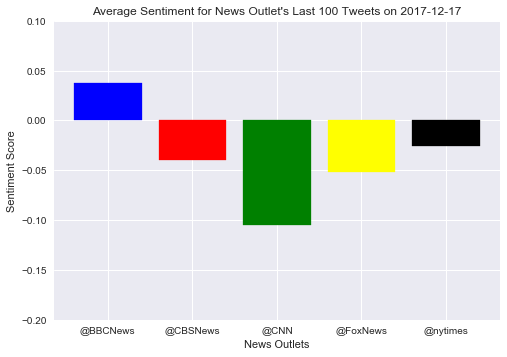

In [72]:
#Bar chart showing average compound sentiment for each news org

x = np.arange(5)

df_grp = df_tweets_sort
df_grp['compound'] = df_grp['compound'].apply(pd.to_numeric)

df_grp_mean = df_grp.groupby('news_outlet')
df_grp_mean_final = pd.DataFrame(df_grp_mean['compound'].mean())
#df_grp_mean_final = df_grp_mean_final.reset_index()
df_grp_mean_final.head()

barlist = plt.bar(x,df_grp_mean_final['compound'])
plt.xticks(x,df_grp_mean_final.index)
barlist[0].set_color('blue')
barlist[1].set_color('red')
barlist[2].set_color('green')
barlist[3].set_color('yellow')
barlist[4].set_color('black')
plt.ylim(-.2,.1)
plt.ylabel('Sentiment Score')
plt.xlabel('News Outlets')
plt.title("Average Sentiment for News Outlet's Last 100 Tweets on 2017-12-17")
plt.savefig('News-Outlet-Mean-Sentiment-Bar')
plt.show()